In [37]:
####I downloaded my file from kaggle and the name is 'CALIFONIA HOUSE DATASET' filename is housing
import numpy as np
import pandas as pd
import plotly.express as px

In [38]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [54]:
housing_df_shuffled=housing_df.sample(n=len(housing_df), random_state=1)
housing_df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [64]:
##Here we have to convert our object column which is the ocean_proximity into a binary(0,1)
pd.get_dummies(housing_df_shuffled['ocean_proximity'], dtype=int).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [65]:
print(housing_df_shuffled.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [66]:
housing_df_shuffled.drop('ocean_proximity',axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [67]:
### lets check if our ocean_proximity has finally dropped,
housing_df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [68]:
## As we can see the ocean_proximity is still there,so to be able to solve this problem we will have to concatenate
housing_df_shuffled_final=pd.concat([housing_df_shuffled.drop('ocean_proximity',axis=1),pd.get_dummies(housing_df_shuffled['ocean_proximity'], dtype=int)],axis=1)
housing_df_shuffled_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [75]:
## Here I am moving all the input on my lefthand side and then my output(median_house_value) on my right handside.
housing_df_shuffled_final=housing_df_shuffled_final[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income',
'<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]
housing_df_shuffled_final


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [76]:
housing_df_shuffled_final=housing_df_shuffled_final.dropna()
housing_df_shuffled_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [77]:
housing_df_shuffled_final.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [78]:
len(housing_df_shuffled_final)

20433

In [79]:
train_pd,test_pd,val_pd=housing_df_shuffled_final[:18000],housing_df_shuffled_final[18000:19217],housing_df_shuffled_final[19215:]
len(train_pd),len(test_pd),len(val_pd)

(18000, 1217, 1218)

In [84]:
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_val,y_val=val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]
x_test,y_test=test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [91]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler().fit(x_train[:, :8])
def preprocessor(X):
    A=np.copy(X)
    A[:, :8]=scaler.transform(A[:, :8])
    return A

x_train_preprocessed=preprocessor(x_train)
x_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [92]:
pd.DataFrame(x_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


<Axes: >

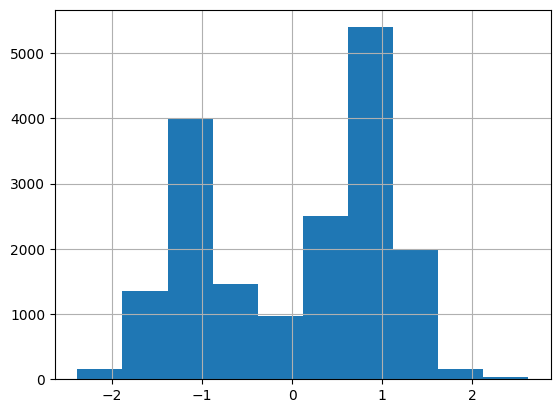

In [94]:
#### Now we represent the table into a histogram to check for outliers
pd.DataFrame(x_train_preprocessed)[0].hist()


In [99]:
x_train,x_val,x_test=preprocessor(x_train),preprocessor(x_val),preprocessor(x_test)
x_train.shape,x_val.shape,x_test.shape



((18000, 13), (1218, 13), (1217, 13))

In [100]:
pd.DataFrame(x_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


In [127]:
###Now we compare with Mean_Squared_Error
## sum((y_hat(x)-y)^2)/n that is our predictive value subtracted by error,where 'X' is the vector,'Y_HAT' is the predictive value,'Y' is Error

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
mean_absolute_error(lm.predict(x_train), y_train), mean_absolute_error(lm.predict(x_val), y_val) ###Here the validation error is higher than the training error




(np.float64(49756.21366666667), np.float64(51360.59195402299))

In [128]:
r2_score(lm.predict(x_test),y_test)
#### Here we are having a very low accuracy so we will have to try other models for efficient accuracy

0.47313407714901756

In [116]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=1).fit(x_train, y_train)  ###The more you increase the the n_neigbors the closer the the values becomes
mean_absolute_error(knn.predict(x_train), y_train), mean_absolute_error(knn.predict(x_val), y_val)


(np.float64(0.0), np.float64(45978.70197044335))

In [119]:
from sklearn.ensemble import RandomForestRegressor
rrn=RandomForestRegressor(max_depth=10).fit(x_train, y_train)  ### Here the values are almost equal compared to our previous trainings
mean_absolute_error(rrn.predict(x_train), y_train), mean_absolute_error(rrn.predict(x_val), y_val)
##The higher you increase the 'max_depth' the closer the value becomes to each other


(np.float64(30223.23036628023), np.float64(34468.14574276968))

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=RandomForestRegressor(n_estimators=250).fit(x_train, y_train)  ####  Using this model the higher our estimator the lower value we actualize
mean_absolute_error(rrn.predict(x_train), y_train), mean_absolute_error(gbr.predict(x_val), y_val)



(np.float64(30223.23036628023), np.float64(30356.70304761905))

In [122]:
### coming to the conclusion of my model GradientBoostingRegressor gave the best accuracy compared to all other models on the initial 
##Lets test our model and see how good it is with the predicted value and the Validation mean_squared_error
mean_absolute_error(gbr.predict(x_test), y_test)

np.float64(30866.17450780608)

In [125]:
r2_score(gbr.predict(x_test),y_test)
### Here my R2 accuracy is HIGHLY POSITIVE CORRELATION AND ACCURACY

0.7835234393061816